# CLASSIFICAÇÃO

#### IMPORTANDO PACOTES

In [60]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn import metrics

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.datasets import load_iris

#### CARREGANDO OS DADOS

In [49]:
dados = load_iris(as_frame=True) # carrega o arquivo

iris_dados = dados.data #é o que tá carregando o dataframe
iris_dados['target'] = dados.target # juntando o target com o data(features)

iris_dados #.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### CRIANDO UMA MATRIZ DE CORRELAÇÃO 
(para descobrir quais features tem relações mais fortes com o target)

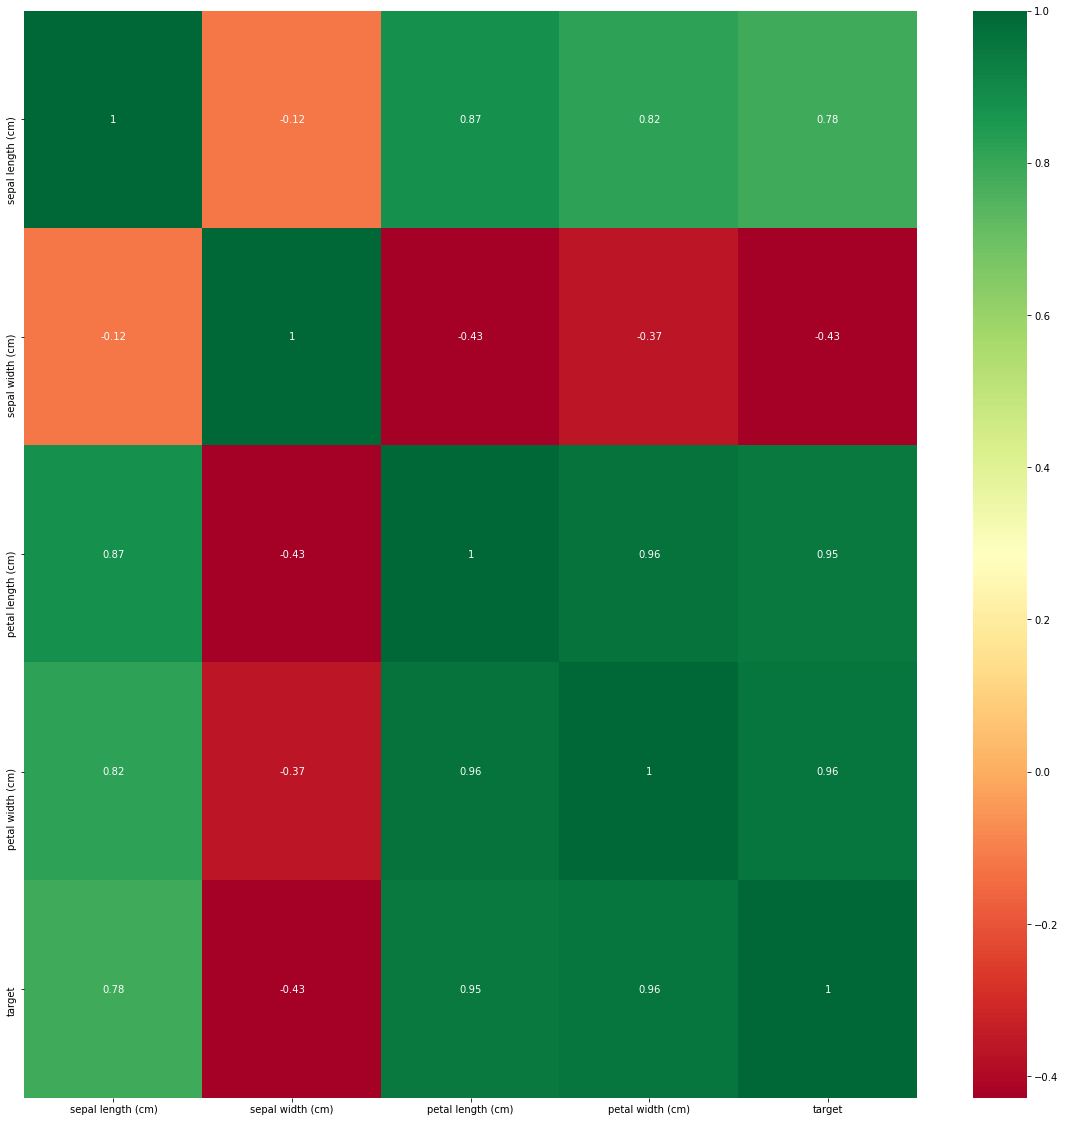

In [50]:
corrmat = iris_dados.corr() #aqui tô criando a correlação

top_corr_features = corrmat.index 

plt.figure(figsize=(20,20)) #criando a figura e dizendo o tamanho

g=sns.heatmap(iris_dados[top_corr_features].corr(),annot=True,cmap='RdYlGn')

As features com correlação mais forte foram "petal width", "petal length" e "sepal lenght"

#### VISUALIZANDO AS FEATURES COM PAIRPLOT - SCATTERPLOTS
Ordem crescente de correlação

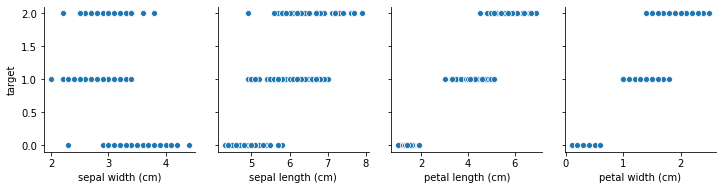

In [51]:
sns.pairplot(iris_dados, y_vars='target', x_vars=['sepal width (cm)','sepal length (cm)','petal length (cm)','petal width (cm)'])


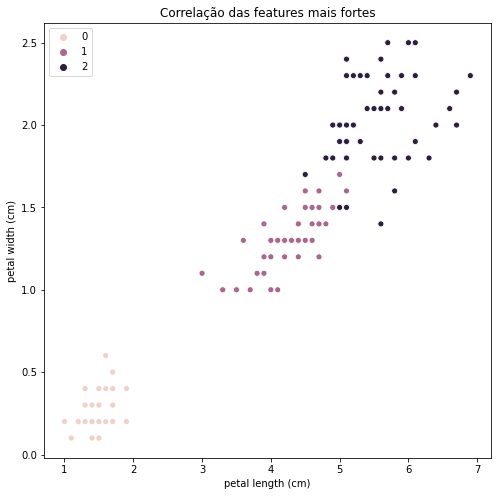

In [66]:
#sns, não consegui escolher as cores
str_f1 = iris_dados['petal length (cm)'].array
str_f2 = iris_dados['petal width (cm)'].array
label = iris_dados['target'].array

fig = plt.figure(figsize=(8,8))
plt.title('Correlação das features mais fortes')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

sns.scatterplot(x=str_f1,y=str_f2,hue=label)
plt.show()

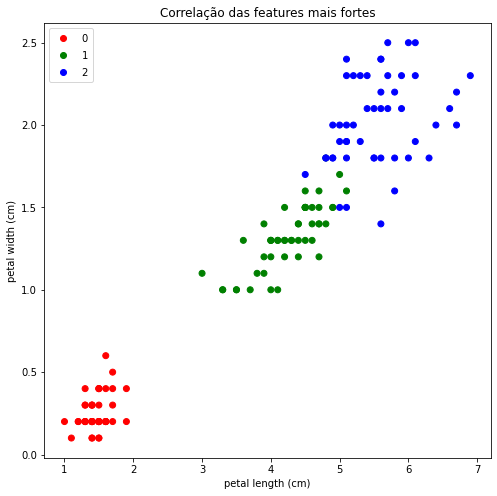

In [69]:
#matplotlib
str_f1 = iris_dados['petal length (cm)'].array
str_f2 = iris_dados['petal width (cm)'].array
label = iris_dados['target'].array
colors = ListedColormap(['r','g','b'])

fig = plt.figure(figsize=(8,8))
plt.title('Correlação das features mais fortes')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

scatter = plt.scatter(str_f1,str_f2,c=label,cmap=colors)
plt.legend(*scatter.legend_elements())

plt.show()

#### SEPARANDO FEATURES E TARGET

In [ ]:
X = iris_dados.drop(columns=['sepal width (cm)','target'])
print(X)

In [ ]:
y = iris_dados['target'].array
print(y)

#### DANDO SHUFFLE NOS DADOS

In [ ]:
Xs, ys = shuffle(X, y, random_state=1)

#### SEPARANDO FEATURES E TARGET DE TREINO E DE TESTE

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.2)

#Feature Scaling

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### TREINANDO E VALIDANDO

1. LOGISTIC REGRESSION

In [ ]:
model1 = LogisticRegression(max_iter=200)
model1.fit(X_train, y_train)
score_basic1 = model1.score(X_test, y_test)

score_basic1

In [ ]:
#Matriz de Confusão para Logistic Regression
lrg_pred = model1.predict(X_test)
print(confusion_matrix(y_test, lrg_pred)) #labels=["0","1","2"]
print(classification_report(y_test,lrg_pred))

2. DECISION TREE

In [ ]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
score_basic2 = model2.score(X_test, y_test)

score_basic2

In [ ]:
#Matriz de Confusão para Decision Tree
dt_pred = model2.predict(X_test)
print(confusion_matrix(y_test, dt_pred)) #labels=["0","1","2"]
print(classification_report(y_test,dt_pred))

3. RANDOM FOREST

In [ ]:
model3 = RandomForestClassifier(n_estimators=10)
model3.fit(X_train, y_train)
score_basic3 = model3.score(X_test, y_test)

score_basic3

In [ ]:
#Matriz de Confusão para Random Forest
rf_pred = model3.predict(X_test)
print(confusion_matrix(y_test, rf_pred)) #labels=["0","1","2"]
print(classification_report(y_test,rf_pred))

4. ADABOOST

In [ ]:
model4 = AdaBoostClassifier()
model4.fit(X_train, y_train)
score_basic4 = model4.score(X_test, y_test)

score_basic4

In [ ]:
#Matriz de Confusão para AdaBoost
ada_pred = model4.predict(X_test)
print(confusion_matrix(y_test, ada_pred)) #labels=["0","1","2"]
print(classification_report(y_test,ada_pred))

5. K-NEAREST NEIGHBORS - KNN

In [ ]:
model5 = KNeighborsClassifier(n_neighbors=5)#(n_neighbors=30) 0.9333
model5.fit(X_train, y_train)
score_basic5 = model5.score(X_test, y_test)

score_basic5

In [ ]:
#Matriz de Confusão para KNN
knn_pred = model5.predict(X_test)
print(confusion_matrix(y_test, knn_pred)) #labels=["0","1","2"]
print(classification_report(y_test,knn_pred))

6. SUPPORT VECTOR MACHINE - SVM

In [ ]:
model6 = SVC(kernel='linear')
model6.fit(X_train, y_train)
score_basic6 = model6.score(X_test, y_test)

score_basic6

In [ ]:
#Matriz de Confusão para SVM
svm_pred = model6.predict(X_test)
print(confusion_matrix(y_test, svm_pred)) #labels=["0","1","2"]
print(classification_report(y_test,svm_pred))

#### VALIDANDO COM CROSS VALIDATION

In [ ]:
modelos = { 
    '1. Logistic Regression': LogisticRegression(max_iter=200),
    '2. Decision Tree': DecisionTreeClassifier(),
    '3. Random Forest': RandomForestClassifier(n_estimators=10),
    '4. Ada Boost': AdaBoostClassifier(),
    '5. KNN': KNeighborsClassifier(n_neighbors=5),
    '6. SVC': SVC(kernel='linear')}

for name, regression in modelos.items():
  scores = cross_val_score(regression, Xs, ys, cv=10)
  print("{} \nScores: {}\n".format(name, (np.mean(scores))))

#### PREPARANDO O BENCHMARK

In [ ]:
test_size = [0.1,0.2,0.3,0.4] #conjunto de tamanhos de testes: 10%, 20%, 30% e 40%
cross_size = [10,15,20]

models = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('SVC', SVC(kernel='linear'))
]

In [ ]:
data = []
for model in models:
    for test in test_size:
        
        X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=test)
        
        for cv in cross_size:
            model[1].fit(X_train,y_train)
            score_basic = model[1].score(X_test,y_test) #score básico
            
            score = cross_val_score(model[1],Xs,ys,cv=cv)
            score_cross = np.mean(score) #score melhorado pela cross validation
            
            data.append((model[0],test,score_basic,cv,score_cross))
            
benchmark = pd.DataFrame(data, columns=['model', 'test_size', 'score', 'cross_size', 'score_cross'])

In [ ]:
benchmark.sort_values(by='score_cross', ascending=False)[0:10]